In [1]:
# import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [2]:
df = pd.read_excel(r"C:\Users\tasos\OneDrive\Desktop\archive\recurrent_breastcancer.xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 1   menopause    286 non-null    object
 2   tumor-size   286 non-null    object
 3   inv-nodes    286 non-null    object
 4   node-caps    278 non-null    object
 5   deg-malig    286 non-null    int64 
 6   breast       286 non-null    object
 7   breast-quad  285 non-null    object
 8   irradiat     286 non-null    object
 9   target       286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [4]:
df.isna().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiat       0
target         0
dtype: int64

In [5]:
df

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,target
0,30-39,premeno,30-34,0-2,no,3,left,left_low,no,no-recurrence-events
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no,no-recurrence-events
2,40-49,premeno,20-24,0-2,no,2,left,left_low,no,no-recurrence-events
3,60-69,ge40,15-19,0-2,no,2,right,left_up,no,no-recurrence-events
4,40-49,premeno,0-4,0-2,no,2,right,right_low,no,no-recurrence-events
...,...,...,...,...,...,...,...,...,...,...
281,30-39,premeno,30-34,0-2,no,2,left,left_up,no,recurrence-events
282,30-39,premeno,20-24,0-2,no,3,left,left_up,yes,recurrence-events
283,60-69,ge40,20-24,0-2,no,1,right,left_up,no,recurrence-events
284,40-49,ge40,30-34,3-5,no,3,left,left_low,no,recurrence-events


Attributes Description:
- age: Patient's age categorized into ranges (e.g., 10-19, 20-29, etc.).
- menopause: Menopausal status, characterized as lt40 (less than 40), ge40 (greater equal to 40), or premeno.
- tumor-size: Size of the tumor, categorized into specific ranges (in mm).
- inv-nodes: The number (range 0 - 39) of axillary lymph nodes that contain metastatic breast cancer visible on histological examination: 0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23, 24-26, 27-29, 30-32, 33-35, 36-39.
- node-caps: If cancer does metastasize to a lymph node, although outside the tumor's original site, it may remain "contained" by the capsule of the lymph node. However, over time, and with more aggressive disease, the tumor may replace the lymph node and then penetrate the capsule, allowing it to invade the surrounding tissues: yes, no.
- deg-malig: The histological grade (range 1-3) of the tumor. Tumors that are grade 1 predominantly consist of cells that, while neoplastic, retain many of their typical characteristics. Grade 3 tumors predominately comprised of highly abnormal cells: 1, 2, 3.
- breast: The affected breast, identified as left or right.
- breast-quad: Quadrant of the breast affected (e.g., left-up, right-low).
- irradiat: Whether the patient underwent irradiation (yes or no).
- target: no-recurrence-events: Instances indicating no recurrence of breast cancer, recurrence-events: Instances indicating a recurrence of breast cancer.

Question 1: Is there a link between age and cancer occurance?

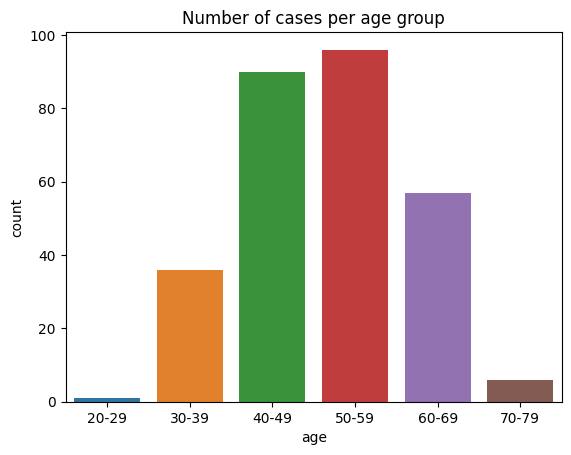

In [6]:
sns.countplot(x = 'age', data = df.sort_values('age'), hue= 'age').set(title='Number of cases per age group')
None

We see that the women between the ages of 40 and 59 are more likely to get breast cancer, according to the dataset. The 30-39 age group is when we first observe a big increase
in cases, so women at that age are advised to start getting tested. 

Question 2: How mane women underwent irradiation treatment, and if so, did it affect the chances of recurrence?

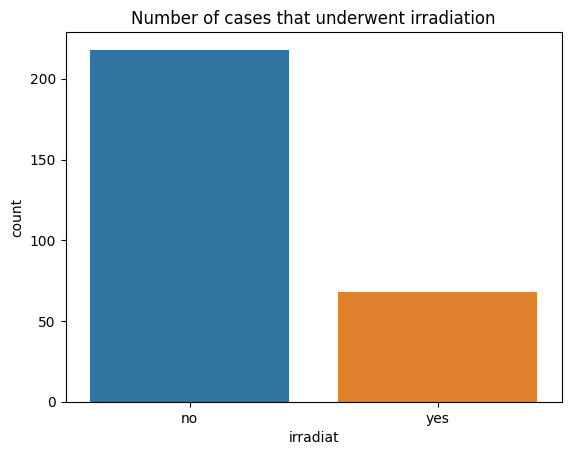

In [7]:
sns.countplot(x = 'irradiat', data = df, hue= 'irradiat').set(title='Number of cases that underwent irradiation')
None

In [8]:
irradiat_df = df[df['irradiat'] == 'yes']
no_irradiat_df = df[df['irradiat'] == 'no']

In [9]:
pie1 = irradiat_df.groupby('target').count().reset_index()[['target', 'age']]
pie1


,target,age
0,no-recurrence-events,37
1,recurrence-events,31


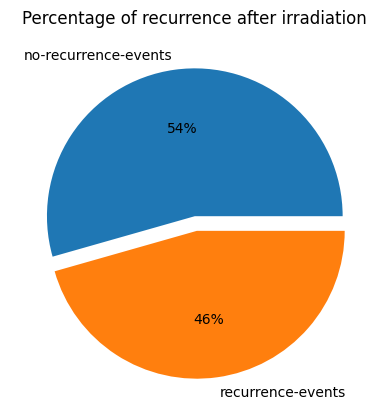

In [10]:
fig, ax = plt.subplots()
plt.pie(pie1['age'], labels=pie1['target'], autopct='%.0f%%', explode=(0, 0.1))
ax.set_title("Percentage of recurrence after irradiation")
plt.show() 

In [11]:
pie2 = no_irradiat_df.groupby('target').count().reset_index()[['target', 'age']]
pie2

,target,age
0,no-recurrence-events,164
1,recurrence-events,54


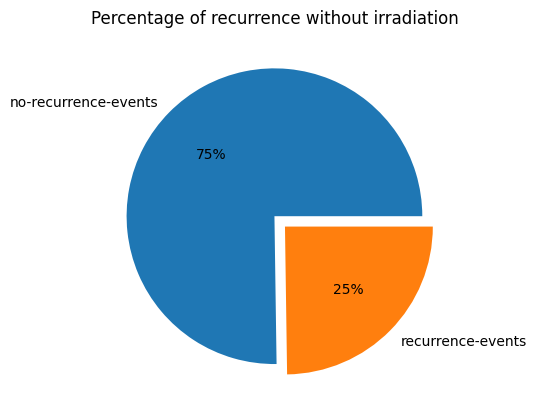

In [12]:
fig, ax = plt.subplots()
plt.pie(pie2['age'], labels=pie2['target'], autopct='%.0f%%', explode=(0, 0.1))
ax.set_title("Percentage of recurrence without irradiation")
plt.show() 

It appears that irradiation plays a part in the recurrence of breast cancer. 46% of women that underwent irradiation treatment exhibit breast 
cancer recurrence. This percentage is 25% in the cases without irradiation treatment.

Question 3: What is the most common tumor size in the 40-59 age group?

In [13]:
df1 = df[df['age'] == '40-49']
df2 = df[df['age']== '50-59']
frames = [df1,df2]
danger_group = pd.concat(frames)

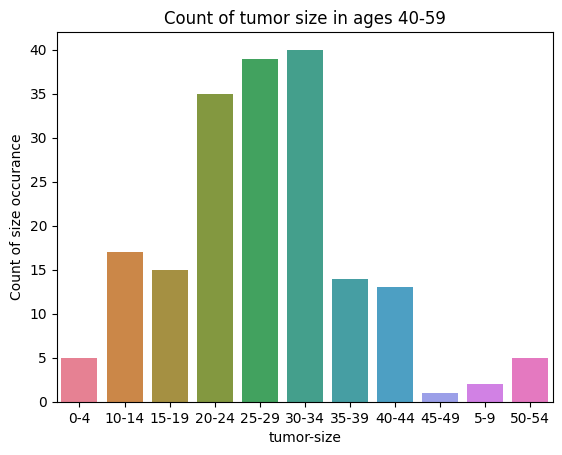

In [14]:
tsize_count = danger_group.groupby('tumor-size').count()
sns.barplot(x = 'tumor-size' , y = 'age', data = tsize_count, hue = 'tumor-size').set(title = 'Count of tumor size in ages 40-59')
plt.ylabel('Count of size occurance')
None

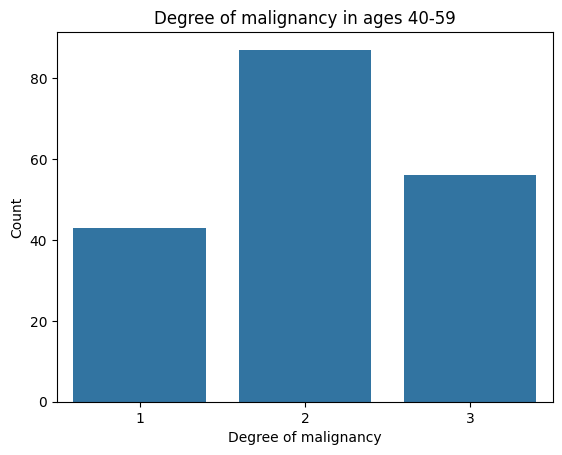

In [15]:
deg_malig = danger_group.groupby('deg-malig').count()
sns.barplot(x = 'deg-malig' , y = 'age', data = deg_malig).set(title = 'Degree of malignancy in ages 40-59')
plt.xlabel('Degree of malignancy')
plt.ylabel('Count')
None

As we can see the most common tumor size in the 40-59 age group is 20-34 mm and the degree of malignancy is 2 for most of the time.

Question 4: Is one side more susceptible than the other? 

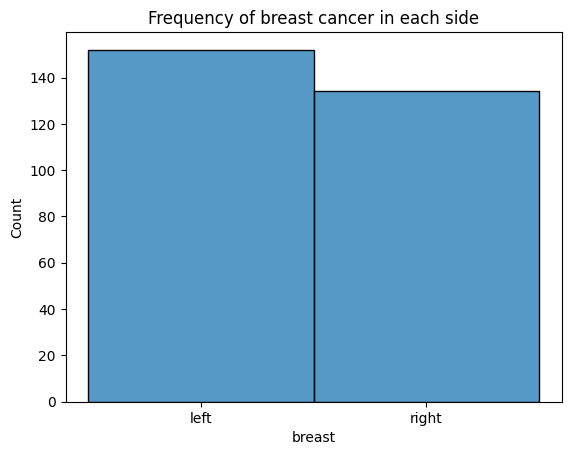

In [16]:
sns.histplot(df['breast']).set(title='Frequency of breast cancer in each side')
None

In [17]:
# fig = px.histogram(df, x="breast", color="breast", title='Frequency of breast cancer in each side', width=800, height=400)
# fig.show()

It seems that side doesn't affect the occurance of breast cancer.

Question 5: Are the affected quadrants of any significance?

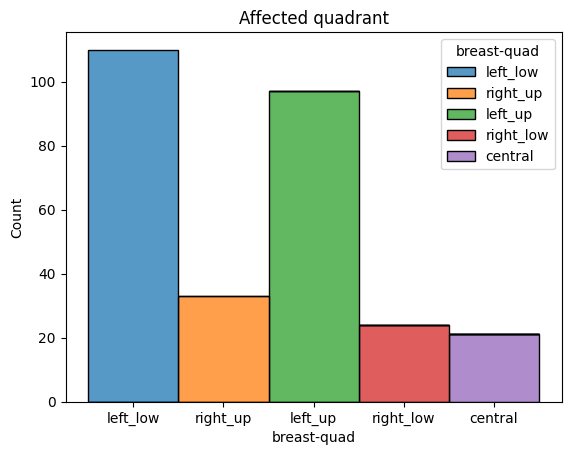

In [18]:
# fig = px.histogram(df, x='breast-quad', color='breast-quad', title='Affected quadrant', width=800, height=400)
# fig.show()

sns.histplot(df, x='breast-quad', hue='breast-quad', multiple="stack").set(title='Affected quadrant')
None

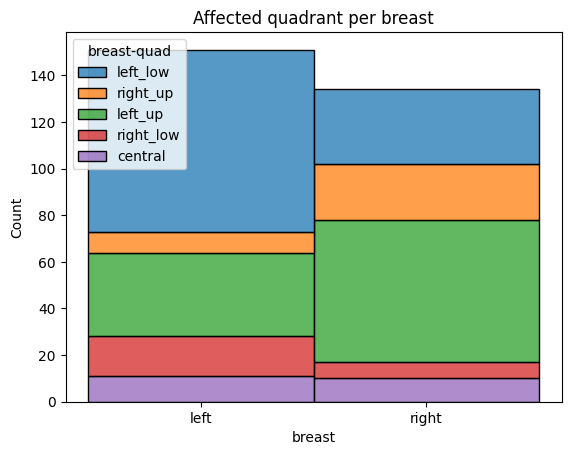

In [19]:
# fig = px.histogram(df, x='breast', color='breast-quad', title='Affected quadrant per breast', width=800, height=400)
# fig.show()

sns.histplot(df, x='breast', hue='breast-quad', multiple="stack").set(title='Affected quadrant per breast')
None


The left quadrants seem to be significantly more affected by breast cancer for both sides (left-low quadrant for the left breast and upper-left quadrant for the right breast).